<a href="https://colab.research.google.com/github/smjason0502/python-deep-learning-pytorch/blob/main/3%EC%A3%BC%EC%B0%A8_%EC%8A%A4%ED%84%B0%EB%94%94(%ED%8C%8C%EC%9D%B4%EC%8D%AC__%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 1. Module Import

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
# 2. 딥러닝모델을 설계할때 활용하는 장비 확인
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, 'Device:',DEVICE)
# Using PyTorch version: 1.5.0+cu101 Device: cuda

Using PyTorch version: 2.4.0+cpu Device: cpu


In [3]:
BATCH_SIZE= 32  #(1)
EPOCHS = 30  #(2)
# BATCH_SIZE: MLP 모델을 학습할때 필요한 데이터 개수의 단위입니다.
#Epoch은 사용자가 정의하는 하이퍼파라미터이며 Mini- Batch의 데이터 개수를 지정해준다면 Iteration은 전체 데이터 개수에서 1개의 Mini Batch를 구성하고 있는 데이터 개수를 나눠준 몫 만큼 Iteration을 진행합니다.

In [4]:
# 3. MNIST 데이터 다운로드 (Train set, Test set 분리하기)

train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = False,
                               transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)
## root: 데이터가 저장될 장소를 지정
## train: 대상 데이터가 MLP모델을 학습하기 위해 이용하는 학습용 데이터인지, MLP모델의 학습된 이후 성능을 검증하기 위한 검증용 데이터인지를 지정합니다
## download: 해당 데이터를 인터넷상에서 다운로드해 이용할 것인지를 지정
## transform : 사람의 손글씨 데이터인 MNIST는 이미지 데이터입니다

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34295893.43it/s]


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1045986.48it/s]


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9687262.08it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6774725.74it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [5]:
## 4. 데이터 확인하기(1)
for (X_train, y_train) in train_loader:
  print('X_train:', X_train.size( ), 'type:', X_train.type())
  print('y_train:', y_train.size( ), 'type:', y_train.type())
  break
## X_train: torch. Size([32, 1, 28, 28]) type: torch.FloatTensor
## y_train: torch. Size([32]) type: torch.LongTensor
## X_train: 32개의 이미지 데이터가 1개의 Mini- Batch를 구성하고 있고 가로 28개, 세로 28개의 픽셀로 구성돼 있으며 채널이 1
## y_train: 32개의 이미지 데이터 각각에 label값이 1개씩 존재하기 때문에 32개의 값을 갖고 있음

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


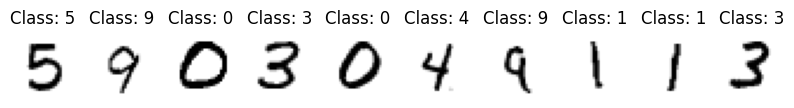

In [6]:
## 5. 데이터 확인하기(2)
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis ('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
  plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
## 6. MLP(Multi Layer Perceptron) 모델 설계 복습

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

In [ ]:
## 6. MLP(Multi Layer Perceptron) 모델 설계

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5
  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

In [ ]:
## 7. Optimizer, Objective Function 설정하기

model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum =0.5)
criterion = nn.CrossEntropyLoss()

print(model)

# Net (
#    (fc1) Linear(in_features=784, out_features=512, bias=True)
#    (fc2) Linear(in_features=512, out_features=256, bias=True)
#    (fc3) Linear(in_features=256, out_features=10, bias=True)
#)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
## 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss. backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))

In [ ]:
## 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct =0

    with torch.no_grad():
      for image, label in test_loader:
          image = image.to(DEVICE)
          label = label.to(DEVICE)
          output = model(image)
          test_loss += criterion(output, label).item()
          prediction = output.max(1, keepdim = True)[1]
          correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss/= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
## 10. MLP 학습을 실행하면서 Train , Test set의 Loss 및 Test set Accuracy를 확인
for Epoch in range(1,EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
    format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.509566
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.364148
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.361538
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.405480
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.381466
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.258226
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.375727
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.298176
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.333979
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.346128

[EPOCH: 1], 	Test Loss: 0.0713, 	Test Accuracy: 21.09 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.335711
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.302653
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.256804
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.263341
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 2.331337
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 2.231790
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 2.099073
Train Epoch: 2 [448

[예제 3-2] 사람의 손글씨 데이터인 MNIST를 이용해 Multi layer perceptron 설계 시 Dropout + ReLU 적용

In [ ]:
## 6. MLP(Multi Layer Perceptron) 모델 설계
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

In [ ]:
## 7. Optimizer, Objective Function 설정하기

model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum =0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
## 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss. backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))

In [ ]:
## 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct =0

    with torch.no_grad():
      for image, label in test_loader:
          image = image.to(DEVICE)
          label = label.to(DEVICE)
          output = model(image)
          test_loss += criterion(output, label).item()
          prediction = output.max(1, keepdim = True)[1]
          correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss/= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
## 10. MLP 학습을 실행하면서 Train , Test set의 Loss 및 Test set Accuracy를 확인
for Epoch in range(1,EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
    format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.299414
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.071992
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 1.052967
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.758389
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.672984
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.637664
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.476984
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.284353
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.269193
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.300450

[EPOCH: 1], 	Test Loss: 0.0100, 	Test Accuracy: 90.92 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.663335
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.414254
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.742160
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.330806
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.217546
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.315389
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.257469
Train Epoch: 2 [448

[예제 3-3] 사람의 손글씨 데이터인 MNIST를 이용해 Multi layer perceptron 설계 시 Dropout + ReLU + Batch Normalization 적용

In [7]:
## 6. MLP(Multi Layer Perceptron) 모델 설계
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5
    self.batch_norm1 = nn.BatchNorm1d(512)
    self.batch_norm2 = nn.BatchNorm1d(256)

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = self.batch_norm1(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

In [ ]:
## 7. Optimizer, Objective Function 설정하기

model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum =0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
## 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss. backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))

In [ ]:
## 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct =0

    with torch.no_grad():
      for image, label in test_loader:
          image = image.to(DEVICE)
          label = label.to(DEVICE)
          output = model(image)
          test_loss += criterion(output, label).item()
          prediction = output.max(1, keepdim = True)[1]
          correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss/= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
## 10. MLP 학습을 실행하면서 Train , Test set의 Loss 및 Test set Accuracy를 확인
for Epoch in range(1,EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
    format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.363431
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.304765
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.343100
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.636476
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.254173
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.428315
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.603718
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.239786
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.302210
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.095502

[EPOCH: 1], 	Test Loss: 0.0051, 	Test Accuracy: 95.03 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.268714
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.428376
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.562298
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.366340
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.131888
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.175513
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.111457
Train Epoch: 2 [448

[예제 3-4] 사람의 손글씨 데이터인 MNIST를 이용해 Multi layer perceptron 설계 시 Dropout + ReLU + Batch Normalization + He Uniform Initialization 적용

In [ ]:
## 7. Optimizer, Objective Function 설정하기

import torch.nn.init as init
def weight_init(m):
  if isinstance(m, nn.Linear):
    init.kaiming_uniform_(m.weight.data)

model = Net().to(DEVICE)
model.apply(weight_init)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [ ]:
## 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss. backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))

In [ ]:
## 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct =0

    with torch.no_grad():
      for image, label in test_loader:
          image = image.to(DEVICE)
          label = label.to(DEVICE)
          output = model(image)
          test_loss += criterion(output, label).item()
          prediction = output.max(1, keepdim = True)[1]
          correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss/= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
## 10. MLP 학습을 실행하면서 Train , Test set의 Loss 및 Test set Accuracy를 확인
for Epoch in range(1,EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
    format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 3.401236
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.799458
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.534906
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.738346
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.417267
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.628738
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.561805
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.853621
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.337830
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.481309

[EPOCH: 1], 	Test Loss: 0.0065, 	Test Accuracy: 93.86 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.477214
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.277452
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.517017
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.316449
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.122450
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.250813
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.451082
Train Epoch: 2 [448

[예제 3-5] 사람의 손글씨 데이터인 MNIST를 이용해 Multi layer perceptron 설계 시 Dropout + ReLU + Batch Normalization + He Uniform Initialization + Adam 적용

In [8]:
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
#optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [9]:
## 7. Optimizer, Objective Function 설정하기

import torch.nn.init as init
def weight_init(m):
  if isinstance(m, nn.Linear):
    init.kaiming_uniform_(m.weight.data)

model = Net().to(DEVICE)
model.apply(weight_init)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [10]:
## 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss. backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))

In [11]:
## 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct =0

    with torch.no_grad():
      for image, label in test_loader:
          image = image.to(DEVICE)
          label = label.to(DEVICE)
          output = model(image)
          test_loss += criterion(output, label).item()
          prediction = output.max(1, keepdim = True)[1]
          correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss/= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [12]:
## 10. MLP 학습을 실행하면서 Train , Test set의 Loss 및 Test set Accuracy를 확인
for Epoch in range(1,EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
    format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 4.144012
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.600573
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.368451
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.502128
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.320942
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.890798
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.210245
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.209502
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.288036
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.379800

[EPOCH: 1], 	Test Loss: 0.0059, 	Test Accuracy: 94.60 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.733912
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.639740
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.413995
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.180639
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.375919
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.977501
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.633872
Train Epoch: 2 [448

[예제 3-6] 옷 종류 데이터 FashionMNIST 활용하여 AutoEncoder 설계

 특정 값으로 예측하거나 특정 클래스로 분류하는 것이 아니라 원본 데이터를 생성하는 AutoEncoder를 실습

In [13]:
'''
1. 모듈 임포트하기
2. 딥러닝 모델을 설계할 때 활용하는 장비 확인
3. FashionMNIST 데이터 다운로드하기(Train set, Test set 분리하기)
4. 데이터 확인하기 (1)
5. 데이터 확인하기 (2)
6. AutoEncoder (AE) 모델 설계하기
7. Opimizer, Objective Function 설정하기
8. AE모델 학습을 진행하면서 학습 데이터에 대한 모델의 성능을 확인하는 함수 정의
9. 학습되는 과정 속에서 검증 데이터에 대한 모델성능을 확인하는 함수 정의하기
10. AutoEncoder학습을 실행하면서 Test set의 Reconstruction Error 확인하기
'''

'\n1. 모듈 임포트하기\n2. 딥러닝 모델을 설계할 때 활용하는 장비 확인\n3. FashionMNIST 데이터 다운로드하기(Train set, Test set 분리하기)\n4. 데이터 확인하기 (1)\n5. 데이터 확인하기 (2)\n6. AutoEncoder (AE) 모델 설계하기\n7. Opimizer, Objective Function 설정하기\n8. AE모델 학습을 진행하면서 학습 데이터에 대한 모델의 성능을 확인하는 함수 정의\n9. 학습되는 과정 속에서 검증 데이터에 대한 모델성능을 확인하는 함수 정의하기\n10. AutoEncoder학습을 실행하면서 Test set의 Reconstruction Error 확인하기\n'

In [14]:
## 1. Module Import

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [15]:
## 2. 딥러닝 모델 설계 시 활용 장비 확인

if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch. device('cpu')
print('Using PyTorch version:', torch.__version__, 'Device:', DEVICE)
# Using PyTorch version : 1.5.0+cu101 Device: cuda

Using PyTorch version: 2.4.0+cpu Device: cpu


In [16]:
BATCH_SIZE = 32
EPOCHS = 10

In [18]:
## 3. FashionMNIST 데이터 다운로드(Train set, Test set 분리하기)

train_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                      train = True,
                                      download = True,
                                      transform = transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                     train = False,
                                     transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [19]:
## 4. 데이터 확인하기(1)

for (X_train, y_train) in train_loader:
  print('X_train:', X_train.size(), 'type:', X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break

#  X_train: torch.Size([32, 1, 28, 28]) type: torch. FloatTensor
#  y_train: torch.Size([32]) type:torch.LongTensor

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


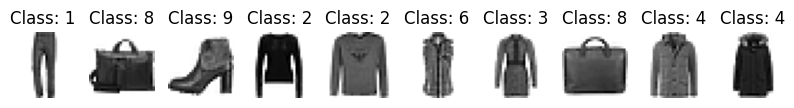

In [20]:
## 5. 데이터 확인하기(2)

pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap = "gray_r")
  plt.title('Class: ' + str(y_train[i].item()))

In [21]:
## 6. AutoEncoder(AE)모델설계하기

class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,32),)

    self.decoder = nn.Sequential(
        nn.Linear(32,256),
        nn.ReLU(),
        nn.Linear(256,512),
        nn.ReLU(),
        nn.Linear(512, 28 * 28),)
  def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return encoded, decoded


In [22]:
## 7. Optimizer,objective Function 설정하기

model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters() ,lr= 0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [23]:
## 8. AE 모델 학습을 진행하며 학습데이터에 대한 모델성능을 확인하는 함수 정의

def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, _) in enumerate(train_loader):
    image = image.view(-1, 28 * 28).to(DEVICE)
    target = image.view(-1, 28 * 28).to(DEVICE)
    optimizer.zero_grad( )
    encoded, decoded = model(image)
    loss = criterion(decoded, target)
    loss.backward( )
    optimizer.step( )

    if batch_idx & log_interval == 0:
        print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
            Epoch, batch_idx * len(image),
            len(train_loader.dataset), 100. * batch_idx / len(train_loader),
            loss.item()))


In [24]:
## 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의

def evaluate(model, test_loader):
  model.eval()
  test_loss=0
  real_image=[]
  gen_image=[]
  with torch.no_grad():
    for image, _ in test_loader:
      image = image.view(-1,28*28).to(DEVICE)
      target = image.view(-1,28*28).to(DEVICE)
      encoded, decoded = model(image)

      test_loss += criterion(decoded, image).item()
      real_image.append(image.to ("cpu"))
      gen_image.append (decoded.to("cpu"))

  test_loss /= len(test_loader.dataset)
  return test_loss, real_image, gen_image

Train Epoch: 1 [0/60000(0%)]	Train Loss: 0.013681
Train Epoch: 1 [32/60000(0%)]	Train Loss: 0.014159
Train Epoch: 1 [64/60000(0%)]	Train Loss: 0.014941
Train Epoch: 1 [96/60000(0%)]	Train Loss: 0.016520
Train Epoch: 1 [128/60000(0%)]	Train Loss: 0.017616
Train Epoch: 1 [160/60000(0%)]	Train Loss: 0.015451
Train Epoch: 1 [192/60000(0%)]	Train Loss: 0.017382
Train Epoch: 1 [224/60000(0%)]	Train Loss: 0.015379
Train Epoch: 1 [512/60000(1%)]	Train Loss: 0.018173
Train Epoch: 1 [544/60000(1%)]	Train Loss: 0.015697
Train Epoch: 1 [576/60000(1%)]	Train Loss: 0.014073
Train Epoch: 1 [608/60000(1%)]	Train Loss: 0.013346
Train Epoch: 1 [640/60000(1%)]	Train Loss: 0.015048
Train Epoch: 1 [672/60000(1%)]	Train Loss: 0.012605
Train Epoch: 1 [704/60000(1%)]	Train Loss: 0.014226
Train Epoch: 1 [736/60000(1%)]	Train Loss: 0.016183
Train Epoch: 1 [1024/60000(2%)]	Train Loss: 0.016043
Train Epoch: 1 [1056/60000(2%)]	Train Loss: 0.014708
Train Epoch: 1 [1088/60000(2%)]	Train Loss: 0.014407
Train Epoch: 1

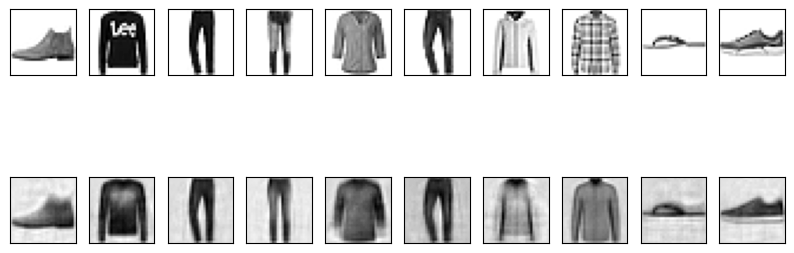

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.010949
Train Epoch: 2 [32/60000(0%)]	Train Loss: 0.011456
Train Epoch: 2 [64/60000(0%)]	Train Loss: 0.014668
Train Epoch: 2 [96/60000(0%)]	Train Loss: 0.013906
Train Epoch: 2 [128/60000(0%)]	Train Loss: 0.010904
Train Epoch: 2 [160/60000(0%)]	Train Loss: 0.011803
Train Epoch: 2 [192/60000(0%)]	Train Loss: 0.016165
Train Epoch: 2 [224/60000(0%)]	Train Loss: 0.012539
Train Epoch: 2 [512/60000(1%)]	Train Loss: 0.011635
Train Epoch: 2 [544/60000(1%)]	Train Loss: 0.011319
Train Epoch: 2 [576/60000(1%)]	Train Loss: 0.013700
Train Epoch: 2 [608/60000(1%)]	Train Loss: 0.013586
Train Epoch: 2 [640/60000(1%)]	Train Loss: 0.012941
Train Epoch: 2 [672/60000(1%)]	Train Loss: 0.013837
Train Epoch: 2 [704/60000(1%)]	Train Loss: 0.011948
Train Epoch: 2 [736/60000(1%)]	Train Loss: 0.013354
Train Epoch: 2 [1024/60000(2%)]	Train Loss: 0.014854
Train Epoch: 2 [1056/60000(2%)]	Train Loss: 0.012329
Train Epoch: 2 [1088/60000(2%)]	Train Loss: 0.011086
Train Epoch: 2

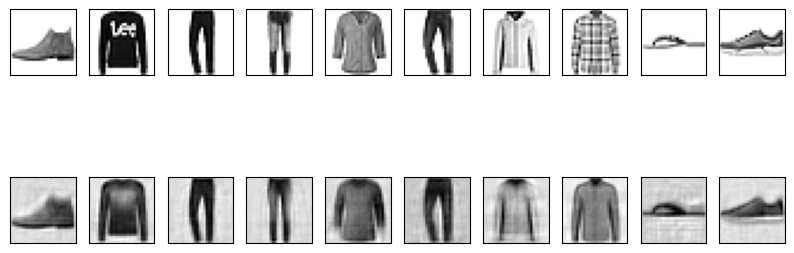

Train Epoch: 3 [0/60000(0%)]	Train Loss: 0.011316
Train Epoch: 3 [32/60000(0%)]	Train Loss: 0.009643
Train Epoch: 3 [64/60000(0%)]	Train Loss: 0.013817
Train Epoch: 3 [96/60000(0%)]	Train Loss: 0.012882
Train Epoch: 3 [128/60000(0%)]	Train Loss: 0.011354
Train Epoch: 3 [160/60000(0%)]	Train Loss: 0.009277
Train Epoch: 3 [192/60000(0%)]	Train Loss: 0.011292
Train Epoch: 3 [224/60000(0%)]	Train Loss: 0.012295
Train Epoch: 3 [512/60000(1%)]	Train Loss: 0.012784
Train Epoch: 3 [544/60000(1%)]	Train Loss: 0.013808
Train Epoch: 3 [576/60000(1%)]	Train Loss: 0.013287
Train Epoch: 3 [608/60000(1%)]	Train Loss: 0.012327
Train Epoch: 3 [640/60000(1%)]	Train Loss: 0.009737
Train Epoch: 3 [672/60000(1%)]	Train Loss: 0.011406
Train Epoch: 3 [704/60000(1%)]	Train Loss: 0.011313
Train Epoch: 3 [736/60000(1%)]	Train Loss: 0.011001
Train Epoch: 3 [1024/60000(2%)]	Train Loss: 0.012943
Train Epoch: 3 [1056/60000(2%)]	Train Loss: 0.010929
Train Epoch: 3 [1088/60000(2%)]	Train Loss: 0.011337
Train Epoch: 3

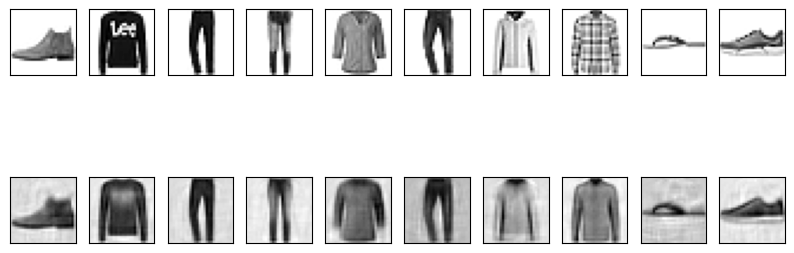

Train Epoch: 4 [0/60000(0%)]	Train Loss: 0.012840
Train Epoch: 4 [32/60000(0%)]	Train Loss: 0.010153
Train Epoch: 4 [64/60000(0%)]	Train Loss: 0.009217
Train Epoch: 4 [96/60000(0%)]	Train Loss: 0.010331
Train Epoch: 4 [128/60000(0%)]	Train Loss: 0.008473
Train Epoch: 4 [160/60000(0%)]	Train Loss: 0.012010
Train Epoch: 4 [192/60000(0%)]	Train Loss: 0.009982
Train Epoch: 4 [224/60000(0%)]	Train Loss: 0.009736
Train Epoch: 4 [512/60000(1%)]	Train Loss: 0.011478
Train Epoch: 4 [544/60000(1%)]	Train Loss: 0.009279
Train Epoch: 4 [576/60000(1%)]	Train Loss: 0.011970
Train Epoch: 4 [608/60000(1%)]	Train Loss: 0.012813
Train Epoch: 4 [640/60000(1%)]	Train Loss: 0.009703
Train Epoch: 4 [672/60000(1%)]	Train Loss: 0.009920
Train Epoch: 4 [704/60000(1%)]	Train Loss: 0.011577
Train Epoch: 4 [736/60000(1%)]	Train Loss: 0.009781
Train Epoch: 4 [1024/60000(2%)]	Train Loss: 0.012831
Train Epoch: 4 [1056/60000(2%)]	Train Loss: 0.011472
Train Epoch: 4 [1088/60000(2%)]	Train Loss: 0.010239
Train Epoch: 4

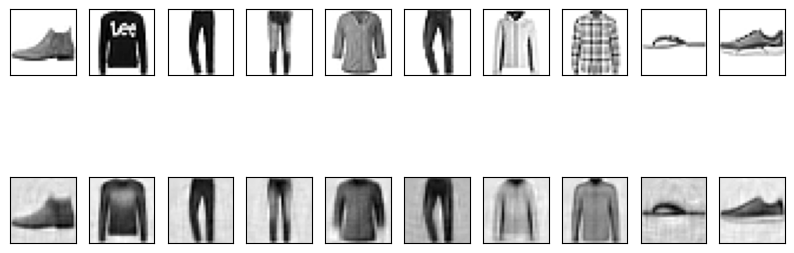

Train Epoch: 5 [0/60000(0%)]	Train Loss: 0.013183
Train Epoch: 5 [32/60000(0%)]	Train Loss: 0.009653
Train Epoch: 5 [64/60000(0%)]	Train Loss: 0.009563
Train Epoch: 5 [96/60000(0%)]	Train Loss: 0.011703
Train Epoch: 5 [128/60000(0%)]	Train Loss: 0.010202
Train Epoch: 5 [160/60000(0%)]	Train Loss: 0.009392
Train Epoch: 5 [192/60000(0%)]	Train Loss: 0.010648
Train Epoch: 5 [224/60000(0%)]	Train Loss: 0.010988
Train Epoch: 5 [512/60000(1%)]	Train Loss: 0.012318
Train Epoch: 5 [544/60000(1%)]	Train Loss: 0.011995
Train Epoch: 5 [576/60000(1%)]	Train Loss: 0.012301
Train Epoch: 5 [608/60000(1%)]	Train Loss: 0.011448
Train Epoch: 5 [640/60000(1%)]	Train Loss: 0.010662
Train Epoch: 5 [672/60000(1%)]	Train Loss: 0.010007
Train Epoch: 5 [704/60000(1%)]	Train Loss: 0.009006
Train Epoch: 5 [736/60000(1%)]	Train Loss: 0.010106
Train Epoch: 5 [1024/60000(2%)]	Train Loss: 0.008350
Train Epoch: 5 [1056/60000(2%)]	Train Loss: 0.010956
Train Epoch: 5 [1088/60000(2%)]	Train Loss: 0.011224
Train Epoch: 5

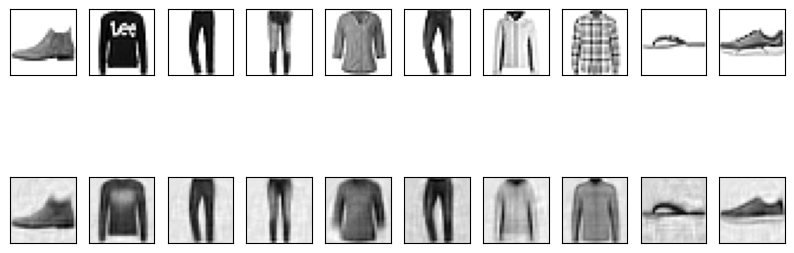

Train Epoch: 6 [0/60000(0%)]	Train Loss: 0.009530
Train Epoch: 6 [32/60000(0%)]	Train Loss: 0.008353
Train Epoch: 6 [64/60000(0%)]	Train Loss: 0.012298
Train Epoch: 6 [96/60000(0%)]	Train Loss: 0.011089
Train Epoch: 6 [128/60000(0%)]	Train Loss: 0.008186
Train Epoch: 6 [160/60000(0%)]	Train Loss: 0.011409
Train Epoch: 6 [192/60000(0%)]	Train Loss: 0.010412
Train Epoch: 6 [224/60000(0%)]	Train Loss: 0.010894
Train Epoch: 6 [512/60000(1%)]	Train Loss: 0.008698
Train Epoch: 6 [544/60000(1%)]	Train Loss: 0.011678
Train Epoch: 6 [576/60000(1%)]	Train Loss: 0.009548
Train Epoch: 6 [608/60000(1%)]	Train Loss: 0.009192
Train Epoch: 6 [640/60000(1%)]	Train Loss: 0.009756
Train Epoch: 6 [672/60000(1%)]	Train Loss: 0.011112
Train Epoch: 6 [704/60000(1%)]	Train Loss: 0.009454
Train Epoch: 6 [736/60000(1%)]	Train Loss: 0.009052
Train Epoch: 6 [1024/60000(2%)]	Train Loss: 0.008711
Train Epoch: 6 [1056/60000(2%)]	Train Loss: 0.010579
Train Epoch: 6 [1088/60000(2%)]	Train Loss: 0.011890
Train Epoch: 6

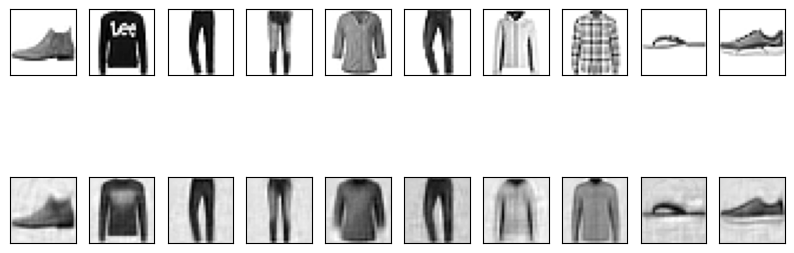

Train Epoch: 7 [0/60000(0%)]	Train Loss: 0.010907
Train Epoch: 7 [32/60000(0%)]	Train Loss: 0.010666
Train Epoch: 7 [64/60000(0%)]	Train Loss: 0.008680
Train Epoch: 7 [96/60000(0%)]	Train Loss: 0.010566
Train Epoch: 7 [128/60000(0%)]	Train Loss: 0.009812
Train Epoch: 7 [160/60000(0%)]	Train Loss: 0.009168
Train Epoch: 7 [192/60000(0%)]	Train Loss: 0.009761
Train Epoch: 7 [224/60000(0%)]	Train Loss: 0.009577
Train Epoch: 7 [512/60000(1%)]	Train Loss: 0.008028
Train Epoch: 7 [544/60000(1%)]	Train Loss: 0.011487
Train Epoch: 7 [576/60000(1%)]	Train Loss: 0.012777
Train Epoch: 7 [608/60000(1%)]	Train Loss: 0.009529
Train Epoch: 7 [640/60000(1%)]	Train Loss: 0.010097
Train Epoch: 7 [672/60000(1%)]	Train Loss: 0.008866
Train Epoch: 7 [704/60000(1%)]	Train Loss: 0.009329
Train Epoch: 7 [736/60000(1%)]	Train Loss: 0.012585
Train Epoch: 7 [1024/60000(2%)]	Train Loss: 0.010140
Train Epoch: 7 [1056/60000(2%)]	Train Loss: 0.010829
Train Epoch: 7 [1088/60000(2%)]	Train Loss: 0.009505
Train Epoch: 7

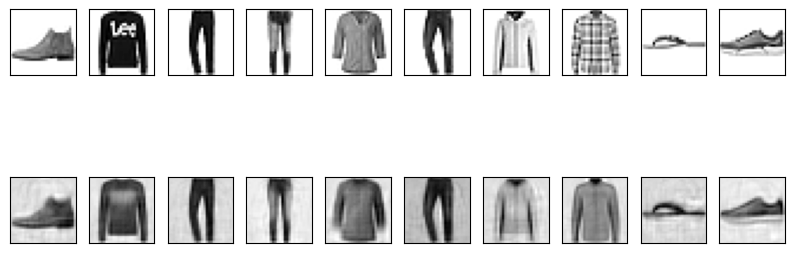

Train Epoch: 8 [0/60000(0%)]	Train Loss: 0.009508
Train Epoch: 8 [32/60000(0%)]	Train Loss: 0.009345
Train Epoch: 8 [64/60000(0%)]	Train Loss: 0.008597
Train Epoch: 8 [96/60000(0%)]	Train Loss: 0.009910
Train Epoch: 8 [128/60000(0%)]	Train Loss: 0.007976
Train Epoch: 8 [160/60000(0%)]	Train Loss: 0.010804
Train Epoch: 8 [192/60000(0%)]	Train Loss: 0.009617
Train Epoch: 8 [224/60000(0%)]	Train Loss: 0.007554
Train Epoch: 8 [512/60000(1%)]	Train Loss: 0.009565
Train Epoch: 8 [544/60000(1%)]	Train Loss: 0.009506
Train Epoch: 8 [576/60000(1%)]	Train Loss: 0.011638
Train Epoch: 8 [608/60000(1%)]	Train Loss: 0.010219
Train Epoch: 8 [640/60000(1%)]	Train Loss: 0.009196
Train Epoch: 8 [672/60000(1%)]	Train Loss: 0.008057
Train Epoch: 8 [704/60000(1%)]	Train Loss: 0.009841
Train Epoch: 8 [736/60000(1%)]	Train Loss: 0.011463
Train Epoch: 8 [1024/60000(2%)]	Train Loss: 0.009023
Train Epoch: 8 [1056/60000(2%)]	Train Loss: 0.008385
Train Epoch: 8 [1088/60000(2%)]	Train Loss: 0.010137
Train Epoch: 8

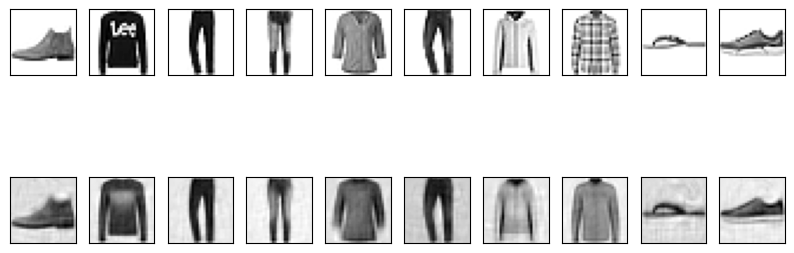

Train Epoch: 9 [0/60000(0%)]	Train Loss: 0.011114
Train Epoch: 9 [32/60000(0%)]	Train Loss: 0.010086
Train Epoch: 9 [64/60000(0%)]	Train Loss: 0.008782
Train Epoch: 9 [96/60000(0%)]	Train Loss: 0.011210
Train Epoch: 9 [128/60000(0%)]	Train Loss: 0.010462
Train Epoch: 9 [160/60000(0%)]	Train Loss: 0.010737
Train Epoch: 9 [192/60000(0%)]	Train Loss: 0.013974
Train Epoch: 9 [224/60000(0%)]	Train Loss: 0.013695
Train Epoch: 9 [512/60000(1%)]	Train Loss: 0.012228
Train Epoch: 9 [544/60000(1%)]	Train Loss: 0.008651
Train Epoch: 9 [576/60000(1%)]	Train Loss: 0.012051
Train Epoch: 9 [608/60000(1%)]	Train Loss: 0.008748
Train Epoch: 9 [640/60000(1%)]	Train Loss: 0.012966
Train Epoch: 9 [672/60000(1%)]	Train Loss: 0.008274
Train Epoch: 9 [704/60000(1%)]	Train Loss: 0.010150
Train Epoch: 9 [736/60000(1%)]	Train Loss: 0.008362
Train Epoch: 9 [1024/60000(2%)]	Train Loss: 0.007427
Train Epoch: 9 [1056/60000(2%)]	Train Loss: 0.010112
Train Epoch: 9 [1088/60000(2%)]	Train Loss: 0.008916
Train Epoch: 9

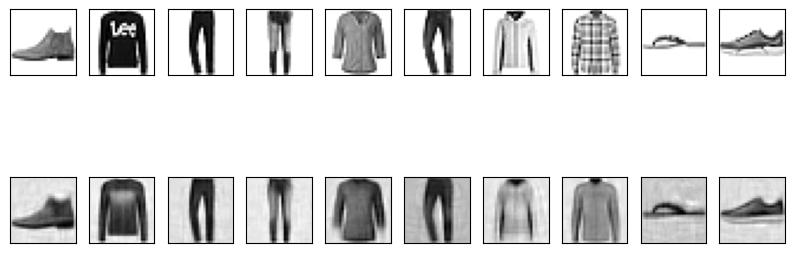

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.009030
Train Epoch: 10 [32/60000(0%)]	Train Loss: 0.009331
Train Epoch: 10 [64/60000(0%)]	Train Loss: 0.010680
Train Epoch: 10 [96/60000(0%)]	Train Loss: 0.009991
Train Epoch: 10 [128/60000(0%)]	Train Loss: 0.007273
Train Epoch: 10 [160/60000(0%)]	Train Loss: 0.011562
Train Epoch: 10 [192/60000(0%)]	Train Loss: 0.009573
Train Epoch: 10 [224/60000(0%)]	Train Loss: 0.011173
Train Epoch: 10 [512/60000(1%)]	Train Loss: 0.008806
Train Epoch: 10 [544/60000(1%)]	Train Loss: 0.009676
Train Epoch: 10 [576/60000(1%)]	Train Loss: 0.011150
Train Epoch: 10 [608/60000(1%)]	Train Loss: 0.007973
Train Epoch: 10 [640/60000(1%)]	Train Loss: 0.010086
Train Epoch: 10 [672/60000(1%)]	Train Loss: 0.007991
Train Epoch: 10 [704/60000(1%)]	Train Loss: 0.009329
Train Epoch: 10 [736/60000(1%)]	Train Loss: 0.009669
Train Epoch: 10 [1024/60000(2%)]	Train Loss: 0.008135
Train Epoch: 10 [1056/60000(2%)]	Train Loss: 0.008704
Train Epoch: 10 [1088/60000(2%)]	Train Loss: 0.00

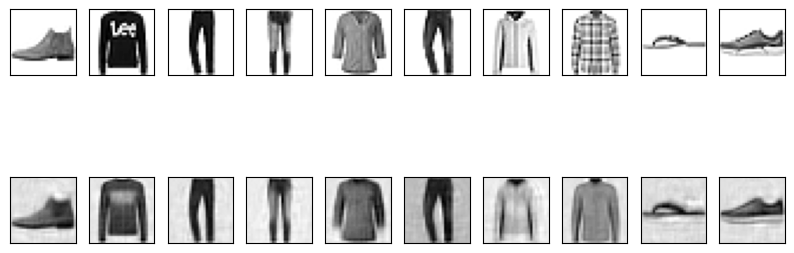

In [26]:
## 10. Auto Encoder학습을 실행하며 Testset의 Reconstruction Error 확인

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval = 200)
  test_loss, real_image, gen_image = evaluate(model, test_loader)
  print("\n[EPOCH: {}], \tTest Loss: {:.4f}".format(Epoch, test_loss))
  f, a = plt.subplots(2,10, figsize = (10,4))
  for i in range(10):
    img = np.reshape(real_image[0][i],(28,28))
    a[0][i].imshow(img, cmap = "gray_r")
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

  for i in range(10):
    img = np.reshape(gen_image[0][i],(28,28))
    a[1][i].imshow(img, cmap = "gray_r")
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())
  plt.show()
